In [1]:
# Importing the library 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

In [2]:
# importing the data 

df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
# Overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# Getting the statisticam measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Cheking the shape of the dataset
df.shape

(2290, 6)

In [8]:
# Checking the number of missing values 
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<ipython-input-16-8b0e06d243d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

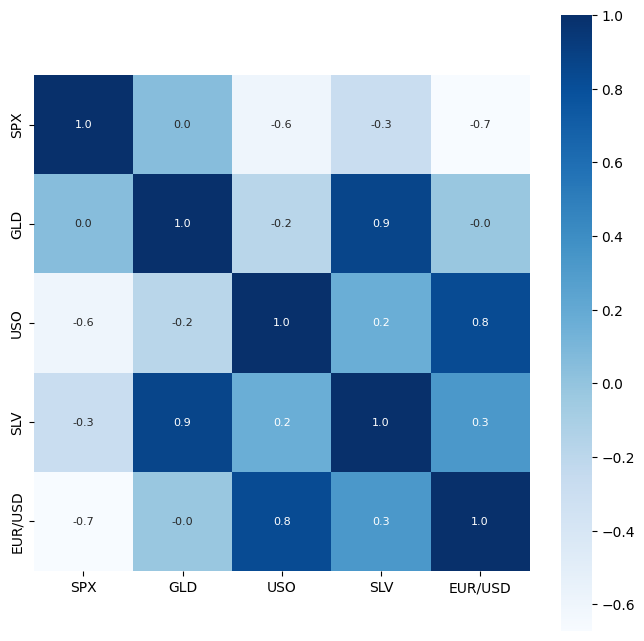

In [16]:
# Checking the correlation of the data 
correlation = df.corr()

# Constructing a heatmap to understand the correlation 

plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
# Correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


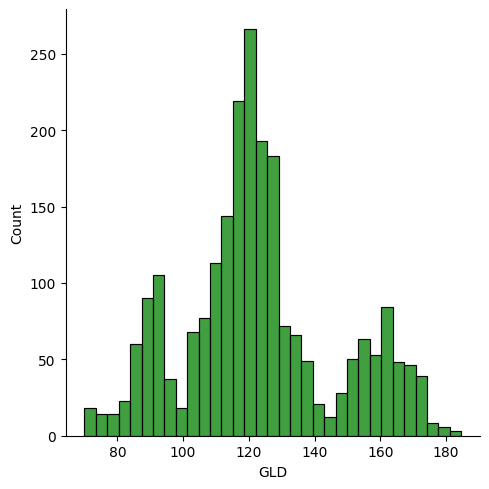

In [25]:
# Cheking the distrubution of the GLD Price

sns.displot(df['GLD'],color='green')

In [26]:
# Spliting the Features and Target 

X = df.drop(['Date','GLD'],axis=1)
y= df['GLD']

In [27]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [28]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [30]:
# Splitting into Traning and Test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [32]:
# Making a model traning : Random Forest

regressor = RandomForestRegressor(n_estimators=100)

In [34]:
# Tranning the model

regressor.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
# Prediction of the Test data

data_predict = regressor.predict(X_test)

In [39]:
# Evaluation of the train & test with the predictive values
# Using R squared error

error_score = metrics.r2_score(y_test,data_predict)
print('The performance of the algorithm :',error_score *100, '%')

The performance of the algorithm : 98.93448609602306 %


In [41]:
# Compare the actual values and predicted values with visualisation

# Convert the y_test in list 
Y_test = list(y_test)

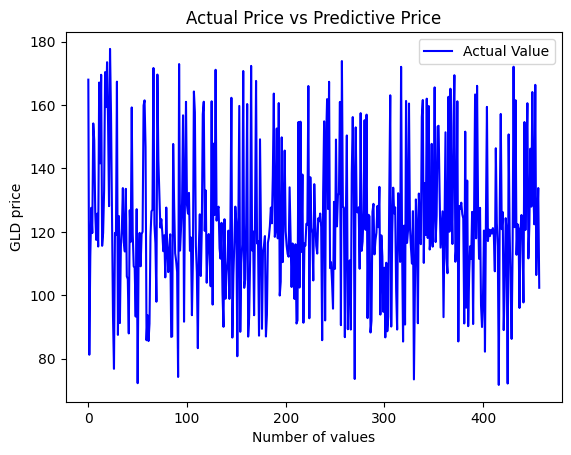

In [44]:
# Actual values 
plt.plot(Y_test, color='blue',label ='Actual Value')
plt.title('Actual Price vs Predictive Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

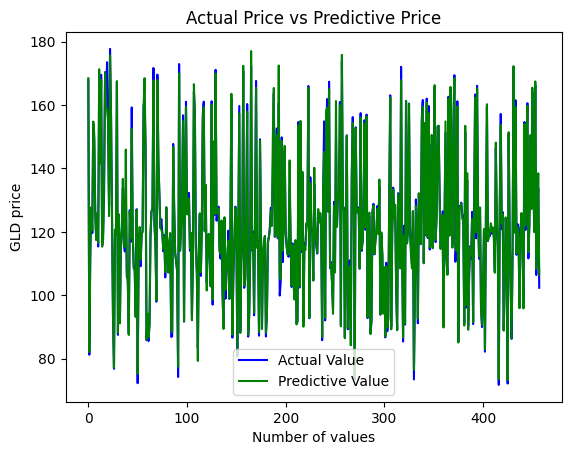

In [43]:
# Predictive values 
plt.plot(Y_test, color='blue',label ='Actual Value')
plt.plot(data_predict,color='green', label='Predictive Value')
plt.title('Actual Price vs Predictive Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()